# Proyecto: Analisis de datos de ventas de videojuegos en 2016

<b>Descripción del Proyecto</b>

Datos de la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas.

Se requiere dentificar patrones que determinen si un juego tiene éxito o no.

Objetivo: detectar proyectos prometedores y planificar campañas publicitarias.

Hay datos que se remontan a 2016. En este contexto es diciembre de 2016 y se planea una campaña para 2017.

El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


## Inicio

### Importar librerías

In [ ]:
# Importar librerías

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy      import stats  as st


### Cargar datos

In [ ]:
# Leer archivo(s)

games_data = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv")

## Preprocesamiento de los datos

### Visualización preliminar de los datos

In [ ]:
display(games_data.head(30))
print('\n')
display(games_data.info(show_counts = True))
print('\n')
display(games_data.describe())


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Duplicados

In [ ]:
# Verificando duplicados

print( games_data [ games_data.duplicated() == True ] )

# Si es "Empty DataFrame" = No hay filas duplicadas

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score, Rating]
Index: []


### Valores nulos

In [ ]:
# Valores ausentes en las columnas: Name, Year_of_Release, Critic_Score, User_Score y Rating

# Ejemplo de valores nulos en una columna Year_of_Release.

display( games_data[games_data['Year_of_Release'].isna()] )

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Observaciones

- Hay 11 columnas
- Hay 16715 filas, lo que significa que se esta evaluando la informacion de esa cantidad de juegos, a menos que hayan duplicados.
-
- <b>VALORES NULOS:</b>
- Hay datos nulos en columnas como Name, Year_of_Release, Critic_Score, User_Score y Rating. Hay que evaluar como proceder para cada uno.
- Los valores 'tbd' que solo se hallaron en la columna 'user_score' se reemplazarán con np.NaN
-
- <b>TIPOS DE DATOS:</b>
- Columna Year_of_Release debería ser tipo entero (int) porque representa el año de lanzamiento de cada videojuego.
- Columna User_Score debería ser tipo float porque son valores que pueden tener decimales y representan la calificacipon que dan los usuarios a un videojuego.
-
- <b>DUPLICADOS:</b>
- No hay filas duplicadas

## Preparación de los datos

### Correcciones

#### Cambiar columnas a minusculas

In [ ]:
# Reemplazar nombres de las columnas (a minúsculas)

games_data.columns = games_data.columns.str.lower()

display(games_data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Error al convertir de float a int. (columna 'Year_of_Release')
Línea de código a ejecutar:
- display ( np.array_equal(games_data['Year_of_Release'], games_data['Year_of_Release'].astype('int')) )

Obtuve al ejecutar --> ValueError: Cannot convert non-finite values (NA or inf) to integer

Por lo tanto, procederé primero a arreglar los valores nulos para posteriormente proceder con las conversiones de datos.

Error al convertir la columna 'user_score' a float por los strings 'tbd' que tiene, se tienen que reemplazar por np.NaN.

- games_data['user_score'] = games_data['user_score'].astype('float')

ValueError: could not convert string to float: 'tbd'

#### Gestión de Valores nulos

Las columnas con valores nulos:

- name : No afecta en el analisis, conservar los NaN
- year_of_release : Podría tener relevancia al tener que seleccionar un periodo para la toma de datos. Se conservan los NaN
- critic_score : Tiene relevancia en el análisis y en comparaciones vs ventas. Se conservan los NaN
- user_score : Lo mismo que la anterior
- rating : Tiene cierta relevancia en el análisis
-
En las 3 últimas columnas, la mitad de los datos son valores ausentes, tal vez si pueda considerarse el reemplazarlos con la media o mediana.
Por esta proporción de valores ausentes, no sería recomendable el descarte de las filas con valores ausentes, convendría imputar o manternerlos.
Por ahora lo manejaremos conservando los datos ausentes y ver que tal.

Los valores pueden estar ausentes por diferentes razones: Factor humano como olvidar rellenar el campo, o se perdieron datos al transferirse desde una base de datos, o un error de programación.


In [ ]:
# Reemplazar valores string 'tbd' a np.NaN

games_data [ games_data.user_score == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [ ]:
games_data['user_score'].replace('tbd', np.NaN, inplace = True )

print( games_data [ games_data.user_score == 'tbd'] )

games_data.info()

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Tipos de datos

In [ ]:
# Convertir de float a str. (columna 'year_of_release')

games_data['year_of_release'] = games_data['year_of_release'].astype("Int64") # Int64 para conservar valores NaN al convertir

games_data.info()
print()
print( games_data['year_of_release'] )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64


In [ ]:
# Convertir de string a float (Columna 'user_score')

games_data['user_score'] = games_data['user_score'].astype('float')

games_data.info()
print()
print( games_data['user_score'] )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64


### Visualización de datos corregidos

In [ ]:
display(games_data.head(30))
print('\n')
display(games_data.info(show_counts = True))
print('\n')
display(games_data.describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


None

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


### Observaciones

- La cantidad de valores no nulos disminuyó al reemplazar los valores 'tbd' por NaN en 'user_score'


### Calcular columna de ventas totales (suma de las ventas en todas las regiones)

In [ ]:
games_data['total_sales'] = games_data[[ 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' ]].sum( axis=1 )

display( games_data )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Análisis de datos



### Cantidad de juegos que fueron lanzados en diferentes años

In [ ]:
games_data.groupby('year_of_release')['name'].count().reset_index()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Los datos de cada periodo dejan observar como desde mediados de los 90s hay un disparo en los juegos lanzados que vuelve a repuntar en los 2000s en la primera mitad y nuevamente en la segunda mitad, donde tuvo su mayor auge de lanzamientos hasta el 2009 y una posterior estabilización progresiva de 2010 en adelante.

### Variación de ventas en las plataformas

In [ ]:
sales_by_platform = games_data.groupby('platform')[ ['total_sales'] ].sum().sort_values(by='total_sales', ascending=False).reset_index()

display( sales_by_platform )

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Las plataformas mas populares son en un top 5:
- PS2
- XBOX 360
- PS3
- Wii
- DS

<b> Ventas totales por año </b>

In [ ]:
sales_by_year = games_data.groupby('year_of_release')['total_sales'].sum().reset_index()
display( sales_by_year.head(37) )

,year_of_release,total_sales
0,1980,11.38
1,1981,35.68
2,1982,28.88
3,1983,16.80
4,1984,50.35
5,1985,53.95
6,1986,37.08
7,1987,21.70
8,1988,47.21
9,1989,73.45


<b> Ventas de cada plataforma por año </b>

In [ ]:
sales_by_platf_year = games_data.groupby(['platform', 'year_of_release'])[ ['total_sales'] ].sum().reset_index().sort_values(by='total_sales', ascending=False)
display( sales_by_platf_year.head(30) )

,platform,year_of_release,total_sales
134,PS2,2004,211.81
200,Wii,2009,206.97
132,PS2,2002,205.38
133,PS2,2003,184.31
199,Wii,2008,171.32
218,X360,2010,170.03
124,PS,1998,169.49
131,PS2,2001,166.43
135,PS2,2005,160.66
147,PS3,2011,156.78


<b> Ventas totales por plataforma y años en orden ascendente de los años. </b>

In [ ]:
sales_by_platf_year2 = games_data.groupby(['platform', 'year_of_release'])[ ['total_sales'] ].sum().reset_index().sort_values(by='year_of_release', ascending=True)
display( sales_by_platf_year2.head(30) )

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
77,NES,1983,10.96
4,2600,1984,0.27
78,NES,1984,50.08
93,PC,1985,0.04
79,NES,1985,53.44
5,2600,1985,0.45


<b> Top 5 de plataformas con mayores ventas por año: </b>

In [ ]:
sales_top5_platf_per_year = sales_by_platf_year2 [sales_by_platf_year2['platform'].isin (['PS2', 'X360', 'PS3', 'Wii', 'DS'])].reset_index( drop=True )

#sales_tp5_platf_per_year = sales_by_platf_year2.groub

display( sales_top5_platf_per_year )

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,PS2,2000,39.17
2,PS2,2001,166.43
3,PS2,2002,205.38
4,PS2,2003,184.31
5,PS2,2004,211.81
6,DS,2004,17.27
7,DS,2005,130.14
8,X360,2005,8.25
9,PS2,2005,160.66


Con las 5 plataformas con mayores ventas, agrupar por año para obtener la distribución:
    Este el dataframe que se utilizará para el gráfico de barras y el histograma.

In [ ]:
sales_by_year_top5plat = sales_top5_platf_per_year.groupby('year_of_release')['total_sales'].sum().reset_index()
display( sales_by_year_top5plat)

,year_of_release,total_sales
0,1985,0.02
1,2000,39.17
2,2001,166.43
3,2002,205.38
4,2003,184.31
5,2004,229.08
6,2005,299.05
7,2006,432.96
8,2007,544.30
9,2008,624.31


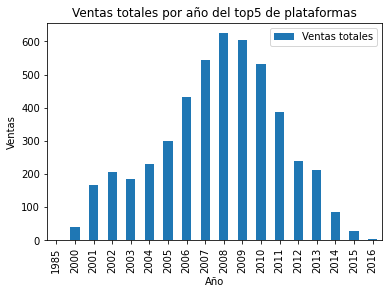

In [ ]:
sales_by_year_top5plat.plot( x = 'year_of_release',
        kind='bar',
        title='Ventas totales por año del top5 de plataformas',
        xlabel='Año',
        ylabel='Ventas')

plt.legend(['Ventas totales'])
plt.show()

De acuerdo con el gráfico de barras estaríamos viendo una distribución normal. Aquí se están representando variables cualitativas, que representan atributos o categorías de la variable, en este caso el año. Son varibales de tipo cualitativa ordinal, ya que claramente se puede establecer un orden entre ellas por que es una serie de un intervalo de años.

<b> Grafico de distribucion con base en los datos de cada año para el TOP 5 de Plataformas </b>

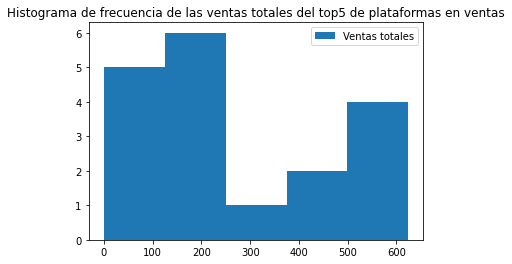

count     18.000000
mean     267.783333
std      208.250025
min        0.020000
25%      106.295000
50%      220.520000
75%      421.445000
max      624.310000
Name: total_sales, dtype: float64


In [ ]:
plt.hist(sales_by_year_top5plat['total_sales'], bins=5)

plt.legend(['Ventas totales'])
plt.title('Histograma de frecuencia de las ventas totales del top5 de plataformas en ventas')
plt.show()

print( sales_by_year_top5plat['total_sales'].describe())

In [ ]:
print( 'Promedio de ventas totales: ', np.mean(sales_by_year_top5plat['total_sales'] ) )

print( 'Mediana: ', np.median(sales_by_year_top5plat['total_sales']))

print( 'Desviación estandar: ', np.std( sales_by_year_top5plat['total_sales'] ) )

print( 'Varianza: ', np.var( sales_by_year_top5plat['total_sales'] ))

Promedio de ventas totales:  267.78333333333353
Mediana:  220.51999999999998
Desviación estandar:  202.38264668142335
Varianza:  40958.73567777783


- Tomando en cuenta las ventas totales de todos los años para estas 5 plataformas, se observa un distribución asimétrica con sesgo a la derecha (positivo).
- La media (promedio) es mayor que la mediana, lo cual cumple con la teoría del sesgo a la derecha
- La desviación estandar es de 202.38
- La varianza e el cuadrado de la desviación estandar = 40958.73


<b> Plataformas que solían ser populares y que ahora no tienen ventas </b>

- Las plataformas mas populares se situan en el 2008 que es donde se tuvieron las mayores ventas

In [ ]:
games_2008 = games_data[games_data['year_of_release'] == 2008]
popular_platform_sales_2008 = games_2008.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
print('Ventas por plataforma en 2008')
display( popular_platform_sales_2008 )

Ventas por plataforma en 2008


,platform,total_sales
6,Wii,171.32
1,DS,145.31
7,X360,135.26
4,PS3,118.52
3,PS2,53.90
5,PSP,34.55
2,PC,12.42
8,XB,0.18
0,DC,0.04


In [ ]:
games_2016 = games_data[games_data['year_of_release'] == 2016]
popular_platform_sales_2016 = games_2016.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
print('Ventas por plataforma en 2016')
display( popular_platform_sales_2016.head(20) )

Ventas por plataforma en 2016


,platform,total_sales
3,PS4,69.25
8,XOne,26.15
0,3DS,15.14
1,PC,5.25
6,WiiU,4.60
4,PSV,4.25
2,PS3,3.60
7,X360,1.52
5,Wii,0.18


Las plataformas mas populares eran de 2008 fueron:
- Wii
- DS
- X360
- PS3
- PS2

De esas, no tienen ventas en 2016:

- DS
- PS2

¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
- Con base en la pregunta anterior tardan en aparecer nuevas plataformas y desparecer antiguas, unos 8 años.
Las nuevas plataformas aparecen a finales de los 90s momento en que se dispara el auge de las ventas que tomando en cuenta el
valor minimo que es el año 1980 pasaron 16 - 20 años para que aparecieran nuevas plataformas que reemplazaron a las del año 1980 hasta mediados de 1990 que les tomó una decada en desaparecer. Esta conclusión se basa en el gráfico de barras por años de las ventas y el dataframe sales_by_platf_year2.

<b> El periodo que se determinó para tomar datos es de 2012 a 2016 </b>
Porque está posterior al auge de plataformas de los 2000 y empiezan a aparecer consolas sucesoras que definiran las nuevas tendencias para el futuro, lo que nos servirá para nuestro objetivo.

In [ ]:
periodo_datos = [ 2012, 2013, 2014, 2015, 2016]
df_games_analysis = games_data[ games_data['year_of_release'].isin( periodo_datos ) ].reset_index(drop=True)

display( df_games_analysis )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [ ]:
df_games_analysis['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

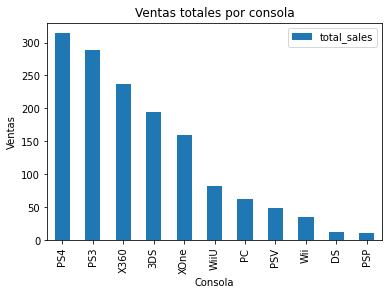

<Figure size 720x432 with 0 Axes>

In [ ]:
df_games_analysis_sales_platf = df_games_analysis.groupby('platform')[ ['total_sales'] ].sum().sort_values(by='total_sales', ascending=False).reset_index()

df_games_analysis_sales_platf.plot( x = 'platform', y = 'total_sales',
        kind='bar',
        title='Ventas totales por consola',
        xlabel='Consola',
        ylabel='Ventas')

plt.figure(figsize=(10,6) )

plt.show()

Aparentemente PS4, PS3 y X360 lideran, pero veamos como se han desempeñado recientemente las plataformas a detalle

In [ ]:
df_games_analysis_sales_platf_year = df_games_analysis.groupby(['platform', 'year_of_release'])[ ['total_sales'] ].sum().reset_index().sort_values(by='total_sales', ascending=False)

display( df_games_analysis_sales_platf_year )

,platform,year_of_release,total_sales
19,PS4,2015,118.90
13,PS3,2013,113.25
12,PS3,2012,107.36
18,PS4,2014,100.00
40,X360,2012,99.74
41,X360,2013,88.58
20,PS4,2016,69.25
47,XOne,2015,60.14
1,3DS,2013,56.57
46,XOne,2014,54.07


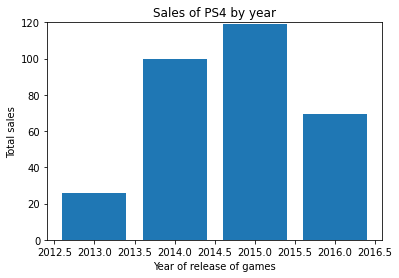

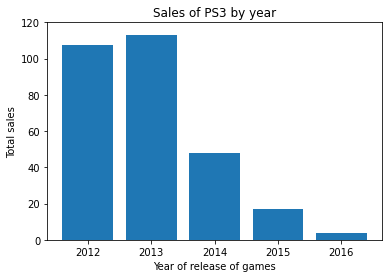

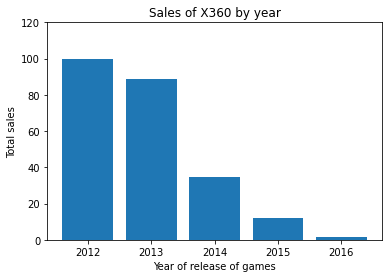

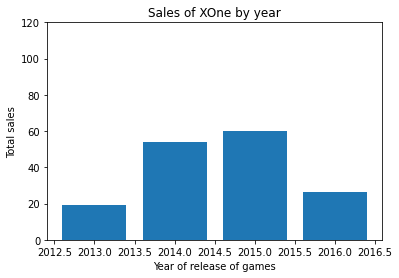

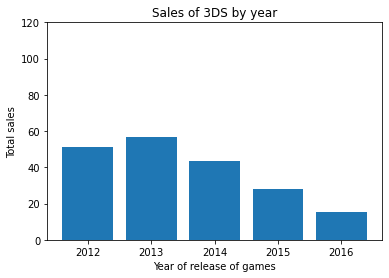

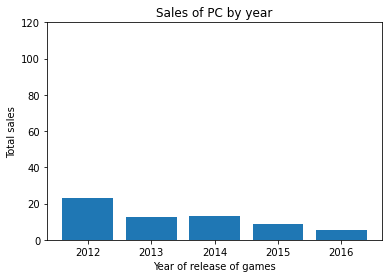

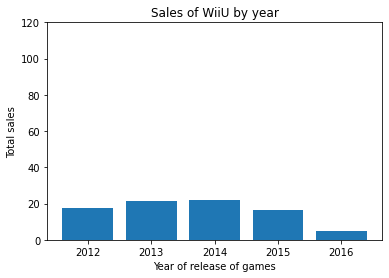

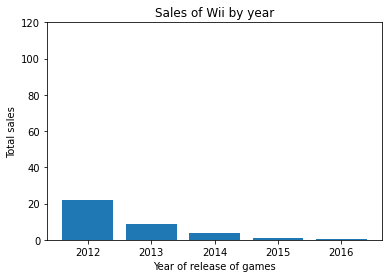

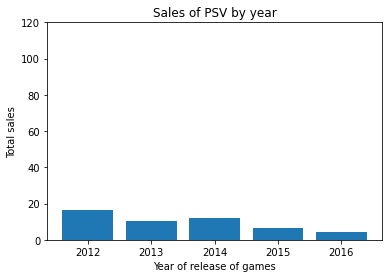

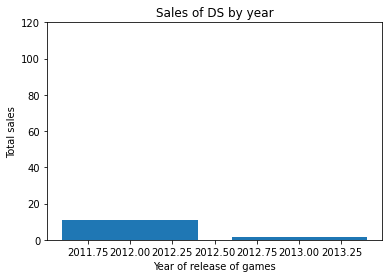

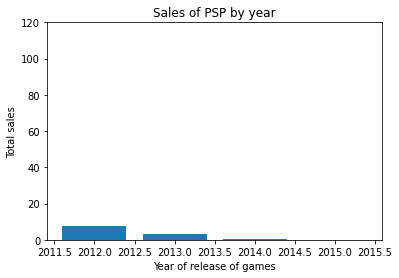

In [ ]:
game_platforms = df_games_analysis_sales_platf_year['platform'].unique()

for platform in game_platforms :
    # Crea para cada consola un grafico que muestre su desarrollo de ventas por año
    plt.figure()
    plt.bar(df_games_analysis_sales_platf_year[
        df_games_analysis_sales_platf_year ['platform'] == platform ] ['year_of_release'],
        df_games_analysis_sales_platf_year[
        df_games_analysis_sales_platf_year['platform'] == platform ] ['total_sales'] )
    plt.ylim(top=120)
    plt.xlabel('Year of release of games')
    plt.ylabel('Total sales')
    plt.title(f'Sales of {platform} by year')
    plt.show()

En el gráfico general del periodo de interés se observó que el top5 de los lideres en Ventas eran:
- PS4
- PS3
- X360
- 3DS
- XOne

Las plataformas PS4 y XboxOne a pesar de no tener una clara tendencia alcista se mantienen y a pesar de que tiene disminuciones, no son tan abruptas. Ambas son consolas de nueva generación, asi que todavía necesitan tiempo para mostrar una tendencia mas definida.
De este top 5 PS3, X360 y 3DS van en una disminución abrupta en sus ventas hacia años más recientes. y del resto de consolas no mencionadas, de igual forma su tendencia es claramente a la baja. La mayoría de estas consolas ya llevan años en el mercado como el DS, Wii, PSP, que tienen sus sucesores activos en el mercado, los cuales, segun la tendencia hacia años recientes, van tambien en disminución, estos son 3DS, WiiU, PSV; que prodrían tener sucesores pronto si sus empresas quieren obtener relevancia en sus respectivos sectores de la industria.

Con base en lo anterior, las mas rentables son el PS4 y XBOXOne que han mantenido buenas ventas.

### Diagrama de caja

Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

Para el dataframe a utilziar para el diagrama de caja, es necesario utilizar el dataframe con todas las columnas del original, solo filtrando los años:

In [ ]:

games_data_box_data = games_data[ games_data['year_of_release'].isin(periodo_datos)]
games_data_box_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

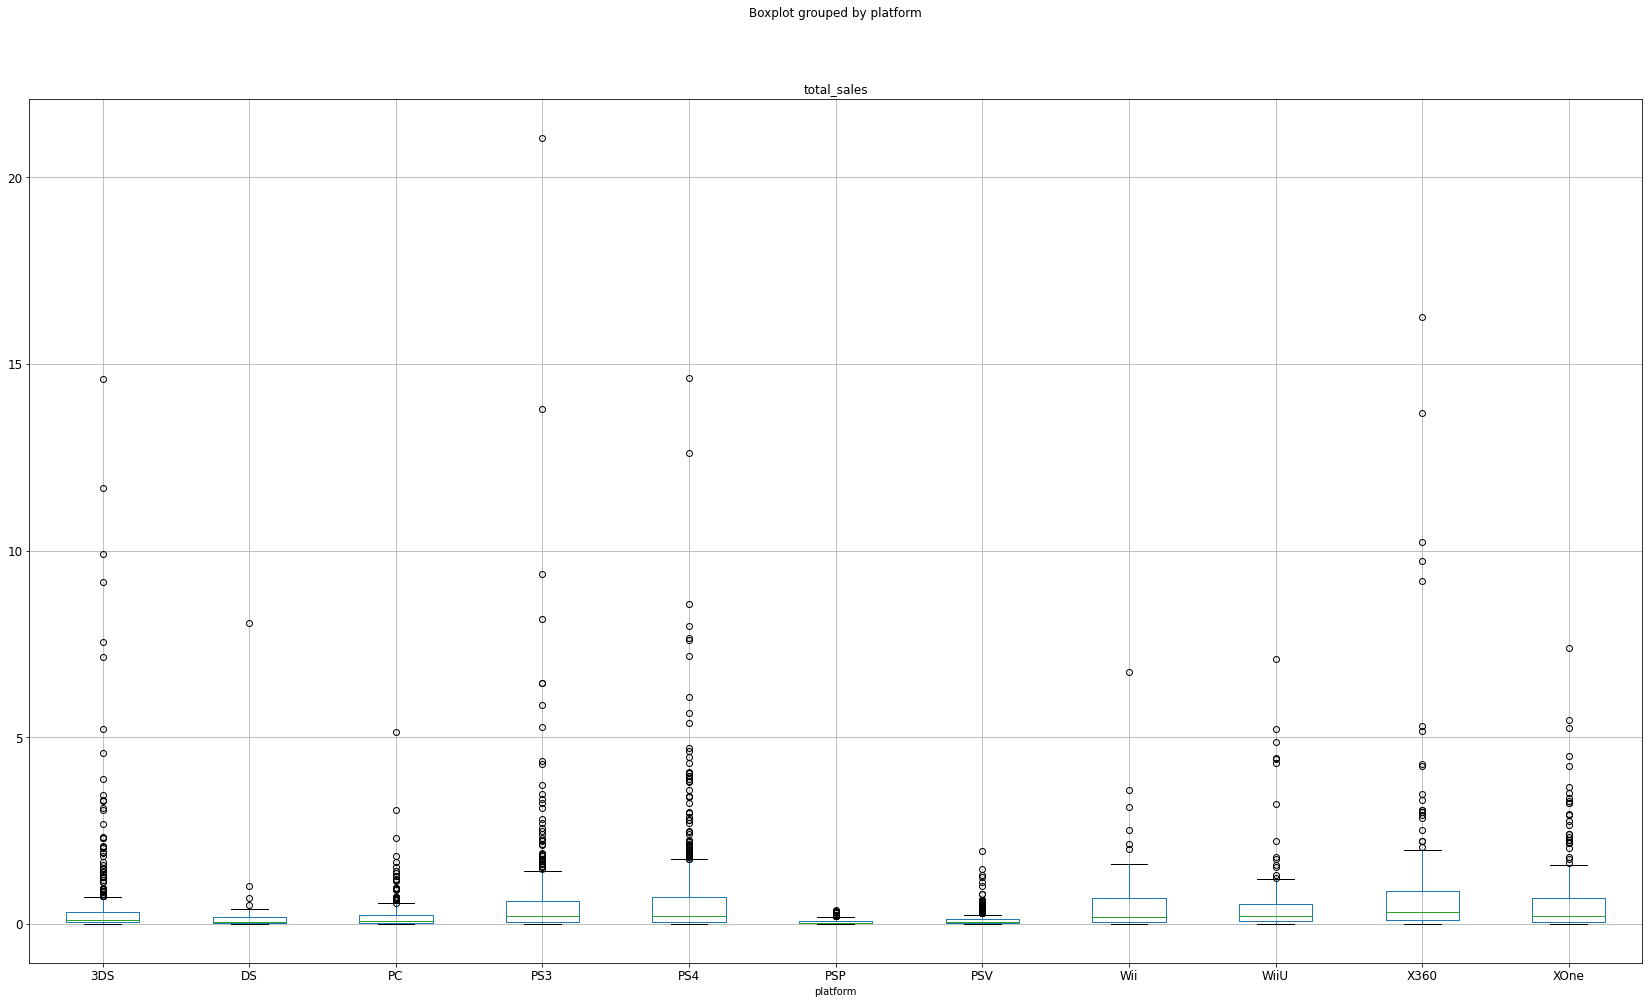

In [ ]:
games_data_box_data.boxplot(by='platform', column='total_sales', figsize=(28,16), fontsize= 'large')


<b>Promedios por plataforma </b>

Promedio general de ventas: 0.5012231462231463


,platform,total_sales
0,3DS,0.491439
1,DS,0.404839
2,PC,0.250600
3,PS3,0.585781
4,PS4,0.801378
5,PSP,0.064682
6,PSV,0.119659
7,Wii,0.655000
8,WiiU,0.559116
9,X360,0.810068


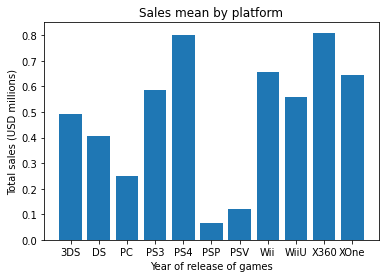

In [ ]:
# Promedio general
game_sales_mean = np.mean(games_data_box_data['total_sales'])
print( f'Promedio general de ventas: {game_sales_mean}')

# Promedio por plataforma
game_sales_mean_plat = games_data_box_data.groupby('platform')['total_sales'].mean().reset_index()
display(game_sales_mean_plat)

# Graficar promedios

plt.figure()

plt.bar(game_sales_mean_plat['platform'], game_sales_mean_plat['total_sales'])

plt.xlabel('Year of release of games')
plt.ylabel('Total sales (USD millions)')

plt.title( 'Sales mean by platform')

plt.show()

Las diferencias en las ventas son significativas entre las diferentes plataformas, destacan mas los datos atipicos de las ventas de ciertas plataformas, fuera de los limites de los graficos de caja, destacando más el PS3 con un dato de venta de mas de 20 millones de USD.

Respecto a las ventas promedio, en varias plataformas se supera el promedio general de las ventas totales (0.501), esto es el caso de PS3, PS4, Wii, WiiU, X360 y XOne; y debajo del promedio general de ventas: 3DS, DS, PC, PSP, PSV. Los valores más altos de promedio reflejan la influencia de los años en que esas plataformas tuvieron ventas muy altas en algunos juegos populares como GTA V y Call of Duty.

### Correlación de las reseñas con ventas

Cómo las reseñas de usuarios y profesionales afectan las ventas del 3DS

In [ ]:
# Filtrar solo filas del 3DS
analysis_3ds = df_games_analysis[ df_games_analysis['platform'] == '3DS' ].reset_index()
display(analysis_3ds)

# Conversión de user_score a la misma escala del critic_score (1-100) para mejor visibilidad
analysis_3ds['user_score'] = analysis_3ds['user_score']*10

display(analysis_3ds.head())

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
1,7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
2,9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
3,13,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
4,20,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2845,Kiniro no Corda 3,3DS,2015,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
392,2848,Balloon Pop 2,3DS,2012,Puzzle,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
393,2862,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
394,2870,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
1,7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
2,9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,72.0,E,9.90
3,13,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,87.0,E,9.17
4,20,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55


In [ ]:
# Filtrar dataframe para el gráfico de dispersión solo con las columnas de interés

df_3ds_scatter = analysis_3ds[ ['critic_score', 'user_score', 'total_sales'] ].reset_index(drop=True)
display(df_3ds_scatter)

,critic_score,user_score,total_sales
0,NaN,NaN,14.60
1,NaN,NaN,11.68
2,78.0,72.0,9.90
3,88.0,87.0,9.17
4,NaN,NaN,7.55
...,...,...,...
391,NaN,NaN,0.01
392,NaN,NaN,0.01
393,NaN,NaN,0.01
394,NaN,NaN,0.01


Text(0, 0.5, 'Total_sales (USD millions)')

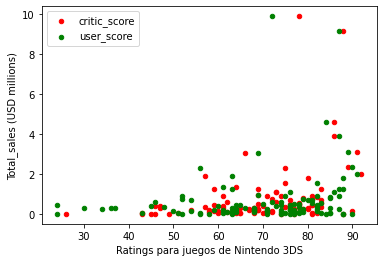

In [ ]:
#Crear gráfico de dispersión
ax1=analysis_3ds.plot(kind='scatter', x='critic_score', y='total_sales', color='r', label='critic_score')

#Agregar otro gráfico de dispersion en la misma figura utilizando otra columna
ax2=analysis_3ds.plot(kind='scatter', x='user_score', y='total_sales', color='g', label='user_score', ax=ax1)

# Etiquetas de los ejes
ax1.set_xlabel('Ratings para juegos de Nintendo 3DS')
ax1.set_ylabel('Total_sales (USD millions)')

In [ ]:
corr_crit_sales = analysis_3ds['total_sales'].corr(analysis_3ds['critic_score'])

print(f'Indice de correlación de score de la critica con las ventas totales: {corr_crit_sales}')

print()

corr_user_sales = analysis_3ds['total_sales'].corr(analysis_3ds['user_score'])

print(f'Indice de correlación de score de la critica con las ventas totales: {corr_user_sales}')



Indice de correlación de score de la critica con las ventas totales: 0.32080286953607845

Indice de correlación de score de la critica con las ventas totales: 0.197582634110386


Los indices de correlación son bajos, no son directamente dependientes los scores de la critica y los usuarios con las ventas.


Este es el total de ventas de los juegos de N3DS en el periodo de interes:

In [ ]:
analysis_3ds.groupby('platform')['total_sales'].sum().reset_index()

,platform,total_sales
0,3DS,194.61


### Comparación con otras plataformas

Para comparación con otras plataformas, se filtrarán los juegos de 3DS que se lanzaron en otras plataformas en el periodo de interés:

In [ ]:
other_plat_analysis = df_games_analysis[ df_games_analysis['name'].isin(analysis_3ds['name']) == True ]

other_plat_analysis.drop(other_plat_analysis[other_plat_analysis['platform'] == '3DS'].index, inplace = True)

other_plat_analysis = other_plat_analysis.reset_index()

display(other_plat_analysis)



/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,15,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
1,26,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
2,28,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
3,38,FIFA Soccer 13,X360,2012,Action,1.09,3.47,0.03,0.57,90.0,6.1,E,5.16
4,40,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,NaN,4.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2790,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
253,2826,Transformers: Prime,Wii,2012,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
254,2855,The Amazing Spider-Man 2 (2014),PC,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
255,2861,Time Travelers,PSP,2012,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01



Se muestran las 10 primeras filas de este nuevo dataframe de juegos de 3DS lanzados en otras plataformas y se calculan las ventas totales que tuvo cada plataforma bajo este criterio:

In [ ]:
display(other_plat_analysis.head(10))

print(other_plat_analysis['platform'].unique())

other_plat_analysis.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,15,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
1,26,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
2,28,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
3,38,FIFA Soccer 13,X360,2012,Action,1.09,3.47,0.03,0.57,90.0,6.1,E,5.16
4,40,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,NaN,4.87
5,52,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
6,54,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
7,93,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E,3.01
8,99,FIFA 15,X360,2014,Sports,0.79,1.92,0.00,0.21,NaN,4.2,E,2.92
9,112,Skylanders Giants,Wii,2012,Action,1.48,0.83,0.00,0.21,78.0,7.0,E10+,2.52


['PS3' 'PS4' 'X360' 'WiiU' 'Wii' 'XOne' 'DS' 'PSV' 'PC' 'PSP']


,platform,total_sales
2,PS3,37.85
8,X360,31.46
3,PS4,17.49
7,WiiU,17.30
6,Wii,13.64
9,XOne,8.32
5,PSV,6.18
0,DS,2.77
1,PC,2.02
4,PSP,1.69


Text(0, 0.5, 'Total_sales (USD millions)')

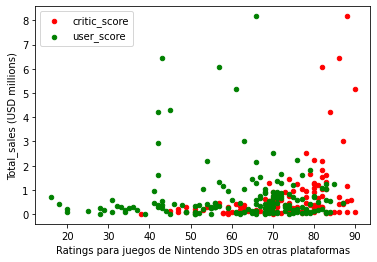

In [ ]:
other_plat_analysis['user_score'] = other_plat_analysis['user_score']*10

#Crear gráfico de dispersión
ax01=other_plat_analysis.plot(kind='scatter', x='critic_score', y='total_sales', color='r', label='critic_score')

#Agregar otro gráfico de dispersion en la misma figura utilizando otra columna
ax02=other_plat_analysis.plot(kind='scatter', x='user_score', y='total_sales', color='g', label='user_score', ax=ax01)

# Etiquetas de los ejes
ax01.set_xlabel('Ratings para juegos de Nintendo 3DS en otras plataformas')
ax01.set_ylabel('Total_sales (USD millions)')

Al comparar las ventas de 3DS vs los mismos juegos de 3DS en otras plataformas, y sus gráficos de dispersión, se tienen las siguientes observaciones:
- Las ventas en 3DS en general son mayores, esto porque en las otras plataformas, los titulos que comparten con 3DS solo representan una fracción de sus ventas totales.
- Al ver los juegos con mayores ventas en general la tendencia es para las otras plataformas, destacando X360 y PS3, que aunque no alcanzaron un maximo como de hasta 10 millones USD como 3DS en un par de titulos, sin embargo; tienen mas titulos con ventas considerables.

### Distribución general de los juegos por género


In [ ]:
sales_genre = df_games_analysis.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending = False)
display(sales_genre)

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


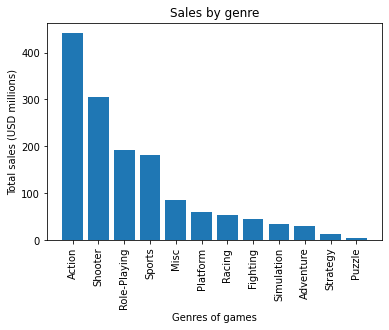

In [ ]:
plt.figure()

plt.bar(sales_genre['genre'], sales_genre['total_sales'])

plt.xlabel('Genres of games')
plt.ylabel('Total sales (USD millions)')

plt.xticks(rotation=90)

plt.title( 'Sales by genre')

plt.show()

Los géneros más rentables son:
- Action
- Shooter
- Role Playing
- Sports

En general, juegos de estos generos son los que encabezan los tops de ventas de las plataformas mas populares, donde destacan títulos como FIFA, Grand Theft Auto, Call of Duty, Mario Bros, Pokemon.

Claro que, no es posible generealizar sin antes analizar las diferencias de ventas entre cada región por género.

### Perfil de usuario para cada región


Se generan perfiles de usuario para las 3 regiones NA, EU y JP, destacando las cinco plataformas principales de cada una, para ver las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [ ]:
na_sales_top5 = df_games_analysis.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending= False )
display(na_sales_top5.head(5))

eu_sales_top5 = df_games_analysis.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending= False )
display(eu_sales_top5.head(5))

jp_sales_top5 = df_games_analysis.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending= False )
display(jp_sales_top5.head(5))

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


En el mercado de NA(Norteamerica) y EU (Europa) el dominio es de Microsoft (X360, XOne) y Sony (PS3, PS4) mientras que en Japón Nintendo domina el mercado (3DS, WiiU) junto a Sony (PS3, PSV, PS4). Parece que en Japón hay mercado para los portables, tendencia que no se ve tanto en las otras regiones.

<b> Generos mas populares por region: </b>

In [ ]:
na_genre_top5 = df_games_analysis.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending= False )
display(na_genre_top5.head(5))

eu_genre_top5 = df_games_analysis.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending= False )
display(eu_genre_top5.head(5))

jp_genre_top5 = df_games_analysis.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending= False )
display(jp_genre_top5.head(5))

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


En cuanto a géneros populares, en NA y EU las preferencias son casi idénticas, sin emaabrgo; en JP se nota que las preferencias cambian, pero siguen dominando los géneros Action y Role-Playing en las 3 regiones. En esta deiferencia influye la cultura de cada región.

<b> Clasificaciones (rating) por región: </b>

In [ ]:
na_ratings = df_games_analysis.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending= False )
display(na_ratings)

eu_ratings = df_games_analysis.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending= False )
display(eu_ratings)

jp_ratings = df_games_analysis.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending= False )
display(jp_ratings)

,rating,na_sales
2,M,231.57
0,E,114.37
1,E10+,75.70
3,T,66.02


,rating,eu_sales
2,M,193.96
0,E,113.03
1,E10+,55.37
3,T,52.96


,rating,jp_sales
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


Las clasificaciones como tal, por si solas, no afectan a las ventas directamente pero están relacionadas con otros factores como el género y el título, que en conjunto si pueden tener un impacto en las ventas.

## Pruebas de hipotesis

### Primera prueba

Hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

Hipotesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes

Valor de umbral alfa (α): 0.05


In [ ]:
# Promedio por plataforma
score_mean_plat = df_games_analysis.groupby('platform')['user_score'].mean().reset_index()
display(score_mean_plat)



,platform,user_score
0,3DS,7.033333
1,DS,7.000000
2,PC,6.428641
3,PS3,6.532862
4,PS4,6.748249
5,PSP,5.950000
6,PSV,7.410000
7,Wii,6.082353
8,WiiU,6.904000
9,X360,6.220851


Lo anterior solo como información, pero en realidad se requiere del dataframe de analisis, 'df_games_analysis', filtrar las filas con Xbox One y PC, cada 'tabla' filtrada por separado.

In [ ]:
# Filtrar dataframe de analiis para extraer la serie de user_score para cada plataforma de interés para realizar la prueba T.

score_plat_xone = df_games_analysis[df_games_analysis['platform'] == 'XOne']['user_score'].dropna()
score_plat_pc = df_games_analysis[df_games_analysis['platform'] == 'PC']['user_score'].dropna()

# Se utiliza .dropna(), para que la prueba T funcione y no resulte en 'nan'

# Prueba las hipótesis

alpha = 0.05

results = st.ttest_ind(score_plat_xone, score_plat_pc)
print( f'valor p: {results.pvalue}' )


if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.5535080500643661
No podemos rechazar la hipótesis nula


### Seguinda prueba

Hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas

Hipotesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

Valor de umbral alfa (α): 0.05

In [ ]:
# Filtrar dataframe de analiis para extraer la serie de user_score para cada genero de interés para realizar la prueba T.

score_gen_action = df_games_analysis[df_games_analysis['genre'] == 'Action']['user_score'].dropna()
score_gen_sport  = df_games_analysis[df_games_analysis['genre'] == 'Sports']['user_score'].dropna()

# Se utiliza .dropna(), para que la prueba T funcione y no resulte en 'nan'

# Prueba las hipótesis

alpha1 = 0.05

results1 = st.ttest_ind(score_gen_action, score_gen_sport)
print('valor p: ', results1.pvalue)


if results1.pvalue < alpha1:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  3.7163089460934874e-26
Rechazamos la hipótesis nula


<b> Comentarios sobre las pruebas </b>

- Para formular las hipótesis, en el caso de la nula, esta expresa que no hay diferencias o cambios entre los grupos y, la alternativa se basa en la nula y expresa diferencias o cambios entre los grupos.

- Se verifica que no haya valores nulos que puedan afectar los resultados con el uso de .dropna()

- Para probar las hipotesis se utilizó la prueba de Student o prueba T para los dos grupos a comparar en cada prueba porque esta determina si hay una diferencia significativa entre las medias de dos grupos.

- La primera prueba indica , con el valor p, que los scores promedio para las dos plataformas no son diferentes, ya que existe un 55% de probabilidad de obtener aleatoriamente una diferencia del tamaño de los datos o mayor. Esta probabilidad es muy alta y por lo tanto no hay diferencia significativa entre los scores promedio de Xbox One y PC.

- Para la segunda prueba, el valor p inidca que los scores promedio para los géneros de Acción(Action) y Deportes (Sports) son diferentes, ya que existe un 3.71 e^-26 % de probabilidad de obtener aleatoriamente una diferencia de los datos o mayor.Esta probabilidad es demasiado baja, casi inexistente, por lo tanto, hay una diferencia significativa entre los scores promedio de los géneros de Acción(Action) y Deportes (Sports).

## Conclusion general

El periodo que se determinó para tomar datos es de 2012 a 2016 porque está posterior al auge de plataformas de los 2000 y empiezan a aparecer consolas sucesoras que definiran las nuevas tendencias para el futuro, lo cual es útil para el objetivo del análisis.

A lo largo del periodo evaluado, se observa como llega el auge de las ventas de videojuegos a finales de la de decada de los 2000s y en la primera mitad de la decada de los 2010s se va acentuando el declive de estas, aunque hay plataformas sucesoras de las anteriores que van estabilizandose y pronto deifinirán una tendencia en la que vuelvan a un auge de ventas, estas son para el caso de Xbox One y PS4, las mas actuales en el set de datos, junto con la PC que de igual manera conforme avanzan los avances tecnológicos estás van adquiriendo mas capacidades, lo que las hace factibles para tener capacidad para soportar mayores exigencias de las que demandan los usuarios de videojuegos, así como otros factores externos que pueden tener relación como el auge de plataformas de ventas digitales y plataformas de streaming que en 2016 van ganando popularidad.

En el caso de Nintendo sus ventas se estan yendo a la baja, necesitan renovarse, tal vez alguna nueva plataforma que pueda hacer frente a las sucesoras actuales de Microsoft y Sony. También se observa que en el resto del mundo las consolas portatiles ya no son tan relevantes como las de sobremesa, excepto en Japón, que estas plataformas todavia tienen ventas relevantes. No convendría apostarle tanto a titulos para plataformas portatiles en otras regiones fuera de Japón pero tampoco dejarlas abandonadas.

Para determinar el éxito de un juego en general, independiente de la región, de acuerdo con el análisis de ventas de 2012 a 2016, debería tener estas características:
- Estar en plataformas modernas como PS3, Xbox 360, Xbox One, PS4 principalmente, incluso también 3DS (sobre todo en Japón)
- Ser de estos géneros: Acción, Disparos, Deportes y Juegos de Rol

Es importante mencionar que los scores de la critica y los usuarios no tienen mayor efecto las ventas, por lo que no es un aspecto muy relevante a considerar

También sería interesante traer al PC la compatibilidad con los titulos populares y promover campañas en plataformas web de streaming para los titulos en las plataformas que se busca generar un interés en los usuarios finales. Otra plataforma que no se contempla aquí y puede ser un área de oportunidad es el smartphone a través de aplicaciones que pueden darle un segundo aire a titulos antiguos y apelar a la nostalgia, en una modalidad freemium, app gratis con compras dentro de la app.

